In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib.image import imread
import warnings
warnings.filterwarnings('ignore')

import tensorflow as tf
from tensorflow import keras

In [2]:
from tensorflow.keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [3]:
x_train.shape, x_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

In [4]:
class_names = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

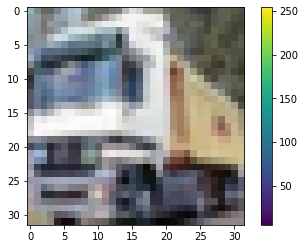

In [5]:
plt.figure()
plt.imshow(x_train[1])
plt.colorbar()
plt.grid(False)

plt.show()

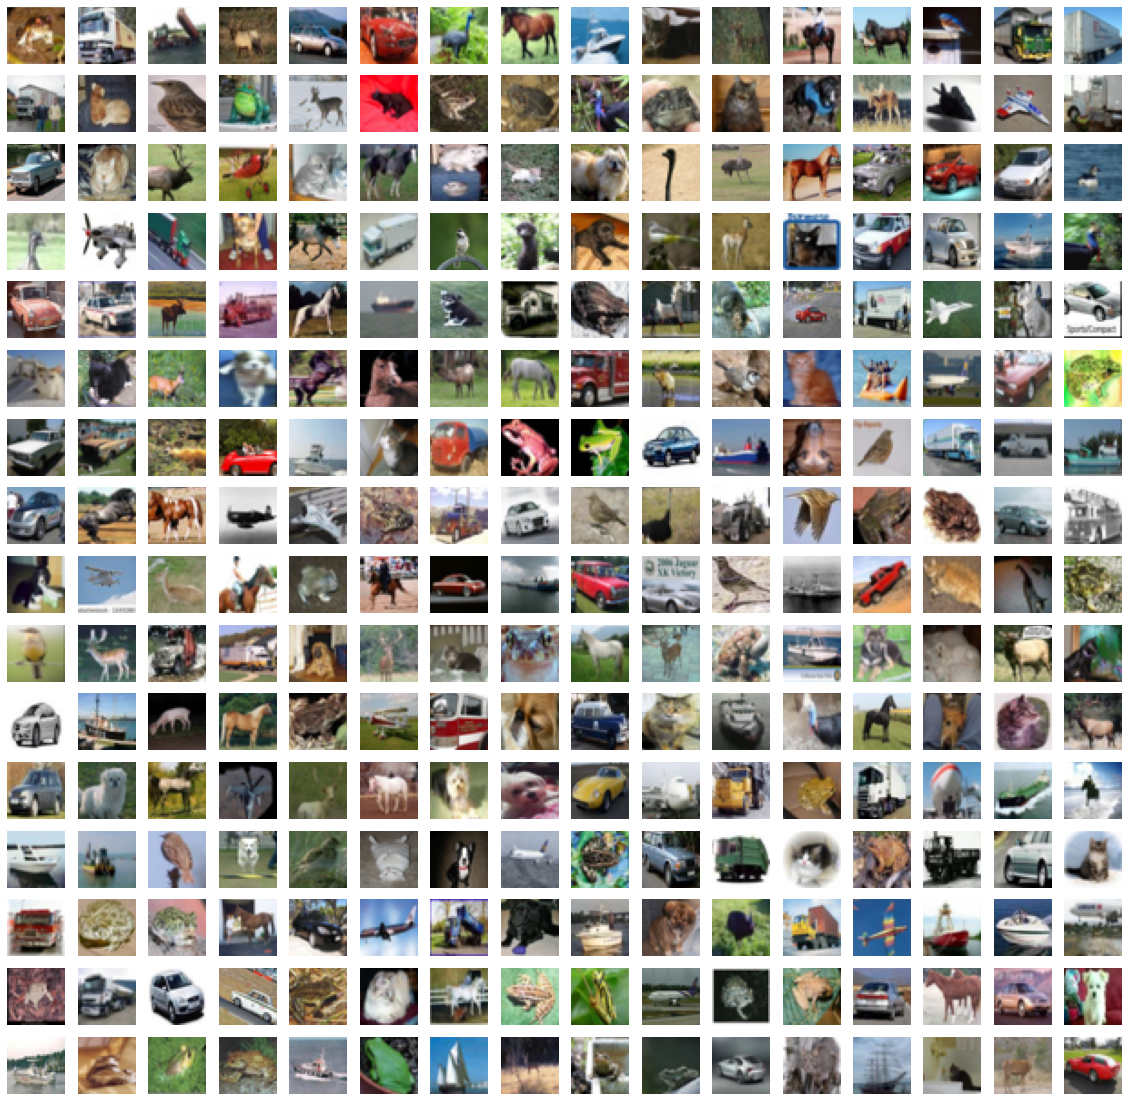

In [6]:
plt.figure(figsize= (20,20))
for i in range(256):
    plt.subplot(16,16,i+1)
    plt.axis('off')
    plt.imshow(x_train[i])

In [7]:
x_train, x_test = x_train / 255.0, x_test / 255.0

In [8]:
model = tf.keras.models.Sequential([
                        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
                        tf.keras.layers.MaxPooling2D(2, 2),
                        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
                        tf.keras.layers.MaxPooling2D(2, 2),
                        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
                        tf.keras.layers.Flatten(),
                        tf.keras.layers.Dense(128, activation='relu'),
                        tf.keras.layers.Dense(10, activation='softmax')])

In [9]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=20, 
                    validation_data=(x_test, y_test))

Epoch 1/20
1563/1563 [==============================] - 37s 23ms/step - loss: 1.4720 - accuracy: 0.4626 - val_loss: 1.2683 - val_accuracy: 0.5511
Epoch 2/20
1563/1563 [==============================] - 37s 24ms/step - loss: 1.1129 - accuracy: 0.6044 - val_loss: 1.1000 - val_accuracy: 0.6028
Epoch 3/20
1563/1563 [==============================] - 45s 29ms/step - loss: 0.9584 - accuracy: 0.6632 - val_loss: 0.9753 - val_accuracy: 0.6530
Epoch 4/20
1563/1563 [==============================] - 36s 23ms/step - loss: 0.8563 - accuracy: 0.6992 - val_loss: 0.8824 - val_accuracy: 0.6911
Epoch 5/20
1563/1563 [==============================] - 39s 25ms/step - loss: 0.7840 - accuracy: 0.7272 - val_loss: 0.8901 - val_accuracy: 0.6952
Epoch 6/20
1563/1563 [==============================] - 36s 23ms/step - loss: 0.7193 - accuracy: 0.7488 - val_loss: 0.8446 - val_accuracy: 0.7079
Epoch 7/20
1563/1563 [==============================] - 46s 30ms/step - loss: 0.6647 - accuracy: 0.7653 - val_loss: 0.8705 -

In [10]:
summary = pd.DataFrame(model.history.history)
summary

,loss,accuracy,val_loss,val_accuracy
0,1.472011,0.46262,1.268347,0.5511
1,1.112935,0.60444,1.099970,0.6028
2,0.958370,0.66320,0.975262,0.6530
3,0.856255,0.69924,0.882389,0.6911
4,0.783994,0.72724,0.890078,0.6952
5,0.719282,0.74882,0.844565,0.7079
6,0.664736,0.76532,0.870509,0.6992
7,0.610794,0.78520,0.923189,0.6963
8,0.565197,0.79994,0.883959,0.7139
9,0.516152,0.81734,0.887766,0.7136


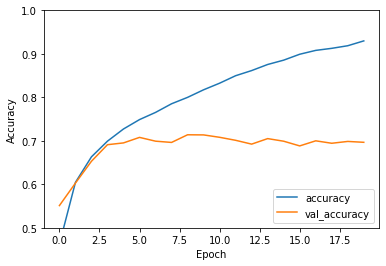

In [11]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')